<a href="https://colab.research.google.com/github/annanasnas/digital_signal_processing/blob/main/%D0%A1%D0%A01_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Самостоятельная работа №1**

Выполнила: Сюракшина Анастасия БИБ191

Номер варианта: 16


**Задание**

Пусть задан амплитудно-модулированный сигнал, в котором несущая
задаётся по формуле: 

$x_1=A*sin(2πf_1t)$, 

а информационный сигнал: 

$x_2=B*sin(2πf_2t)$, 

при этом:

$A=15N, B=N, f_1=3k*N, f_2=100N$

где N – номер в списке группы.


Наложить на АМ-сигнал шум, распределенный по нормальному
закону, с амплитудой, сопоставимой с амплитудой самого сигнала.
Построить односторонний и двухсторонний спектр сигнала с шумом и без
шума при помощи быстрого преобразования Фурье.

**Решение**

In [49]:
!python -m pip install -U numpy matplotlib==3.1.3

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

In [71]:
N = 16
A = 15 * N
B = N
f1 = 3 * 1000 * N
f2 = 100 * N
fs = 3 * f1

t = np.linspace(0, 1, fs)
x1 = A*np.sin(2*pi*f1*t)
x2 = B*np.sin(2*pi*f2*t)

In [72]:
AM = x1*(1+x2/A)
AM_spectr = np.fft.fft(AM)
f = np.arange(fs)

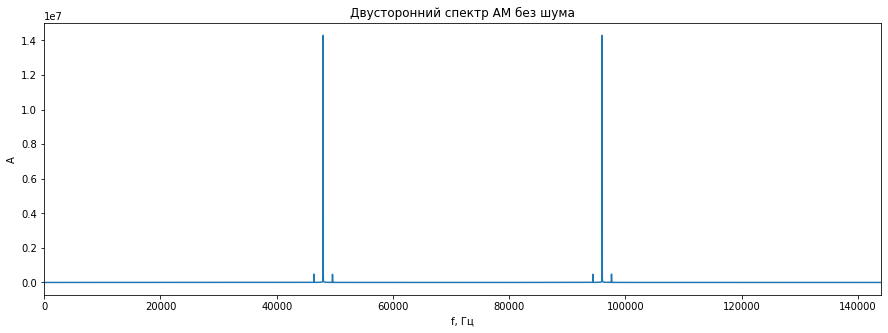

In [73]:
plt.figure(figsize=(15,5))
plt.plot(f, abs(AM_spectr))
plt.xlabel('f, Гц')
plt.ylabel('A')
plt.title('Двусторонний спектр АМ без шума')
plt.xlim(0, fs)
plt.show()

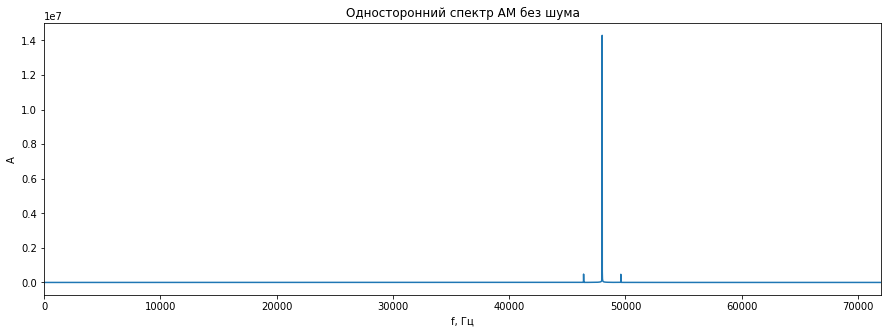

In [74]:
plt.figure(figsize=(15,5))
plt.plot(f, abs(AM_spectr))
plt.xlabel('f, Гц')
plt.ylabel('A')
plt.title('Односторонний спектр АМ без шума')
plt.xlim(0, fs/2)
plt.show()

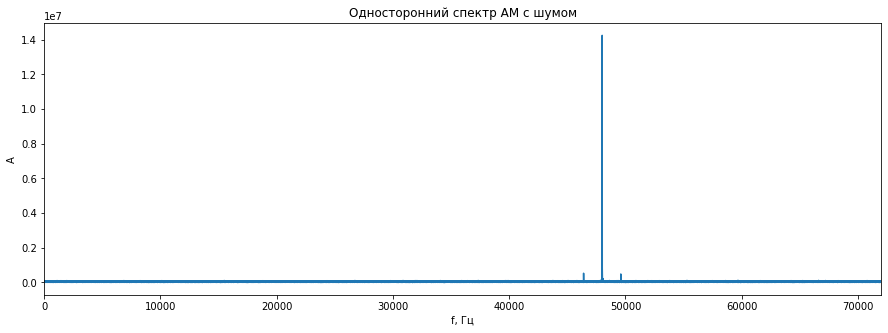

In [76]:
AM_noise = AM + 50*np.random.randn(len(t))
AM_spectr_noise = np.fft.fft(AM_noise)

plt.figure(figsize=(15,5))
plt.plot(f, abs(AM_spectr_noise))
plt.xlabel('f, Гц')
plt.ylabel('A')
plt.title('Односторонний спектр АМ с шумом')
plt.xlim(0, fs/2)
plt.show()

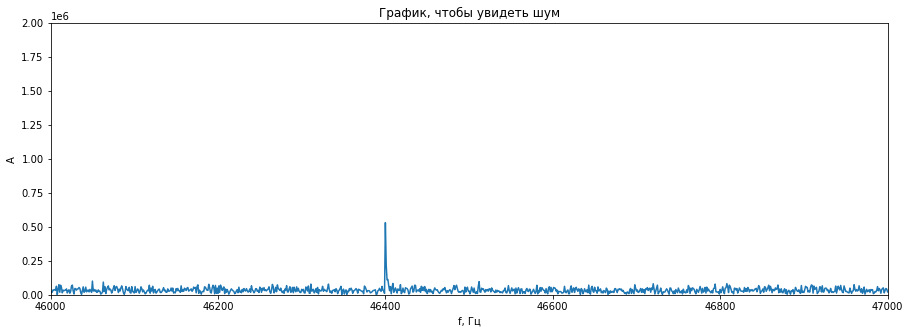

In [84]:
plt.figure(figsize=(15,5))
plt.plot(f, abs(AM_spectr_noise))
plt.xlabel('f, Гц')
plt.ylabel('A')
plt.title('График, чтобы увидеть шум')
plt.ylim(0, 0.2*1e7)
plt.xlim(46000, 47000)
plt.show()

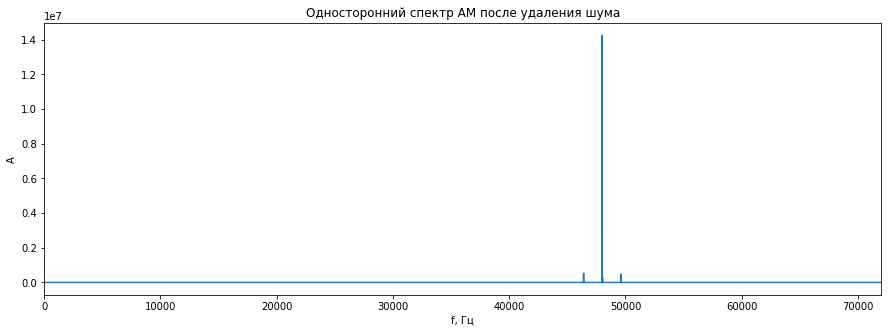

In [86]:
for i in range(len(AM_spectr_noise)):
  if abs(AM_spectr_noise[i]) < 25e4:
    AM_spectr_noise[i] = 0

plt.figure(figsize=(15,5))
plt.plot(f, abs(AM_spectr_noise))
plt.xlabel('f, Гц')
plt.ylabel('A')
plt.title('Односторонний спектр АМ после удаления шума')
plt.xlim(0, fs/2)
plt.show()

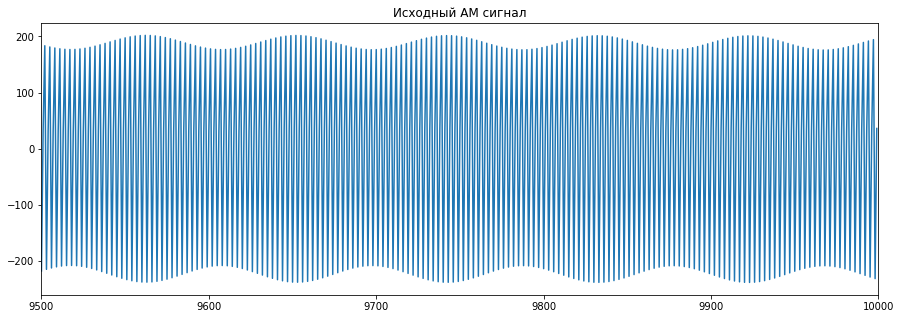

In [87]:
plt.figure(figsize=(15,5))
plt.plot(f[9500:10000], AM[9500:10000])
plt.title('Исходный АМ сигнал')
plt.xlim(f[9500], f[10000])
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  if len(wiskhi) == 0 or np.max(wiskhi) < q3:


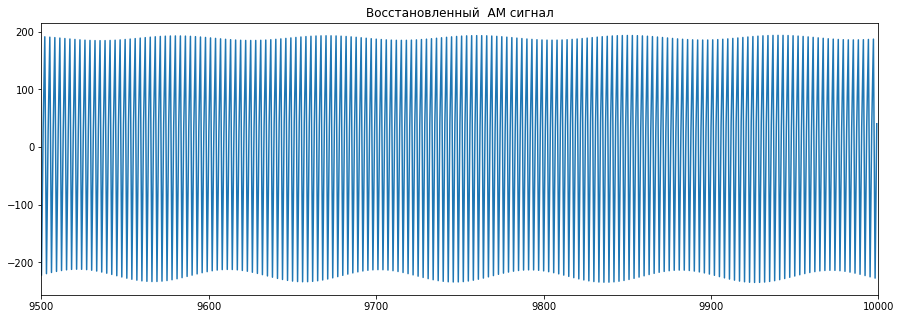

In [88]:
AM2 = np.fft.ifft(AM_spectr_noise)

plt.figure(figsize=(15,5))
plt.plot(f[9500:10000], AM2[9500:10000])
plt.title('Восстановленный  АМ сигнал')
plt.xlim(f[9500], f[10000])
plt.show()